In [ ]:
#Import Libraries

In [1]:
#Fast Fourier Transform = To look for common frequencies, peaks and interruptions
# https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack

expert_data = pd.read_csv('2ex13.csv')
expert_data.head()

time = expert_data.iloc[:,0]
expert_data.columns.get_loc('Input_Bucket RealValue')


29

Text(0,0.5,'Frequency Domain (Spectrum) Magnitude')

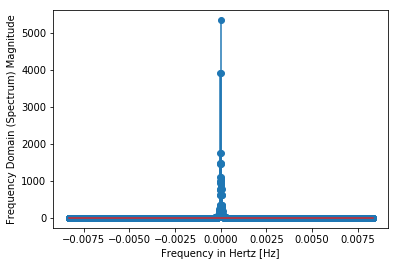

In [7]:
x = expert_data.iloc[:,30]/1000
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * (1/60)

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-(1/6) / 2, (1/60) / 2)
#ax.set_ylim(-5, 110)

C:\Users\wsjr\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


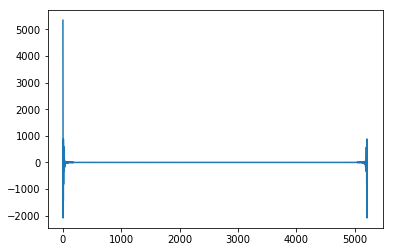

In [8]:
ft = np.fft.fft(x)
plt.plot(ft)
plt.show()

In [ ]:
from scipy import signal

freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning',
                                      nperseg=1024, noverlap=M - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

In [ ]:
#Stationary to check for trends, like tiredness
# https://machinelearningmastery.com/time-series-data-stationary-python/
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('', header=0, index_col=0)
series.plot()
plt.show()

series = pd.read_csv('', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
#Stationary tests using graphs; if it is stationary, we will have a normal distribution that is bell-shaped
# Checking the mean and variance across different data is useful
#https://pythondata.com/stationary-data-tests-for-time-series-forecasting/

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

data = pd.read_csv('DEOK_hourly.csv')
data['Datetime']=pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

data['DEOK_MW'].hist()

one, two, three = np.split(
        data['DEOK_MW'].sample(
        frac=1), [int(.25*len(data['DEOK_MW'])),
        int(.75*len(data['DEOK_MW']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print mean1, mean2, mean3
print var1, var2, var3


In [ ]:
#Data correlation with Lag plots. More corr = easier prediction
#Autocorrelation https://www.machinelearningplus.com/time-series/time-series-analysis-python/
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

df = pd.read_csv()

fig,axes = plt.subplots(1,2,figsize=(16,3),dpi=100)
plot_acf(df.value,lags=50,ax=axes[0])
plot_pacf(df.value,lags=50,ax=axes=[1])

r2 = r2_score(compare_df.actual, compare_df.predicted)

In [ ]:
#Lag plots
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left':False,'axes.titlepad':10})

ss = pd.read_csv()
a10 = pd.read_csv()

fig,axes = plt.subplots(1,4,figsize=(10,3),sharex=True,sharey=True,dpi=100)
for i ,ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value,lag=i+1,ax=axmc='firebrick')
    ax.set_title('Lag'+str(i+1))
    
fig.subtitle('Lag Plots')

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.subtitle('Lag Plots', y=1.05)    
plt.show()

#
pd.tools.plotting.lag_plot(data['DEOK_MW'])

In [ ]:
#Entropy for estimating forecastibility https://www.machinelearningplus.com/time-series/time-series-analysis-python/
ss = pd.read_csv()
a10 = pd.read_csv()
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716


In [ ]:
#Sample entropy https://www.machinelearningplus.com/time-series/time-series-analysis-python/
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

In [ ]:
#Smoothing for trends; butterworth, averaging, Lowess
#https://www.machinelearningplus.com/time-series/time-series-analysis-python/ for LOWESS
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

In [ ]:
#Moving average
import pandas as pd
data = pd.read_csv('')
df = pd.DataFrame(data)
df.rolling(window=2).mean()


In [ ]:
#Moving Average https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

sns.set(style='darkgrid', context='talk', palette='Dark2')
data = pd.read_pickle('')
data.head(10)

short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

start_date = '2015-01-01'
end_date = '2016-12-31'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'MSFT'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')


In [ ]:
#Exponential Moving Average
ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'MSFT'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'MSFT'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'MSFT'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [ ]:
#Butterworth https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [5]:
#Granger Causality to see if one time series can predict another 
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('2ex1.csv')
df1 = df.iloc[:,0]
df2 = df.iloc[:,26]
grangercausalitytests([df1,df2],maxlag=2)

ValueError: Insufficient observations. Maximum allowable lag is -1